In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import kurtosis
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('spambase.csv')
Features = data.iloc[:,:57]
Lables = data.iloc[:,57]
X = np.asarray(Features)
y = np.asarray(Lables)

# Clustering without Dimension Reduction

/Users/kapil_tahiliani/anaconda2/lib/python2.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


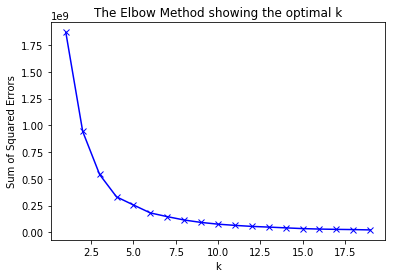

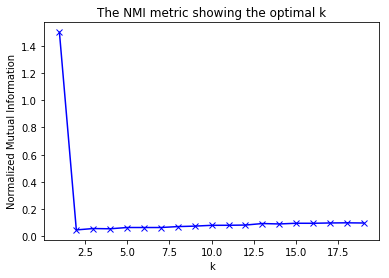

In [3]:
range_n_clusters = list(range(1,20))
sse = []
nmi = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    cluster_labels = clusterer.labels_
    sse.append(clusterer.inertia_)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))
    
plt.plot(range_n_clusters, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Errors')
plt.title('The Elbow Method showing the optimal k')
plt.show()

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('k')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing the optimal k')
plt.show()


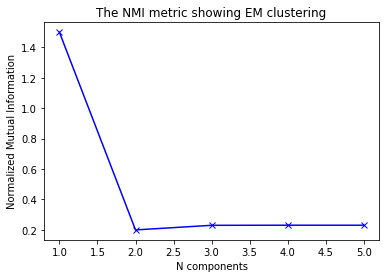

In [4]:
range_n_clusters = list(range(1,6))
nmi = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, random_state=0).fit(X)
    cluster_labels = clusterer.predict(X)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('N components')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing EM clustering')
plt.show()

# Clustering with PCA dimension reduction

In [5]:
pca = PCA(n_components=57)
pca.fit(X)
eigval = pca.explained_variance_ratio_
Accuracy = []
for i in range(1,58):
    pca_curr = PCA(n_components = i)
    X_pca = pca_curr.fit(X).transform(X)
    clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=10)
    FeatTrain4, FeatTest4, LablesTrain4, LablesTest4 = train_test_split(X_pca, Lables, random_state=0, test_size = 0.3)
    clf.fit(FeatTrain4,LablesTrain4)
    test_predict = clf.predict(FeatTest4)
    Accuracy.append(accuracy_score(LablesTest4, test_predict))

   
    

Text(0,0.5,'Accuracy')

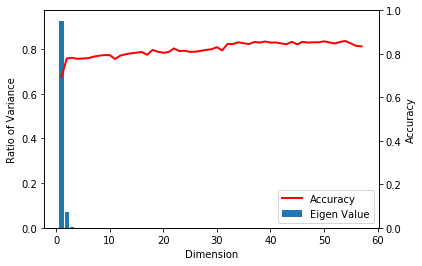

In [24]:
temp = list(range(1,58))
plt.bar(temp,eigval,linewidth = 4,label = "Eigen Value")
plt.plot(temp,Accuracy,color='red', linewidth=2, markersize=12, label = "Accuracy")
plt.xlabel('Dimension')
plt.ylabel('Ratio of Variance')
plt.legend(loc="best")
plt2 = plt.twinx()
plt2.set_ylabel('Accuracy')

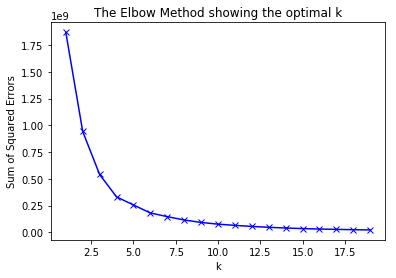

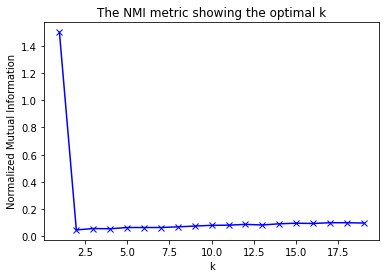

In [30]:
pca = PCA(n_components=16)
X_pca = pca.fit(X).transform(X)
range_n_clusters = list(range(1,20))
sse = []
nmi = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(X_pca)
    cluster_labels = clusterer.labels_
    sse.append(clusterer.inertia_)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))
    
plt.plot(range_n_clusters, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Errors')
plt.title('The Elbow Method showing the optimal k')
plt.show()

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('k')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing the optimal k')
plt.show()



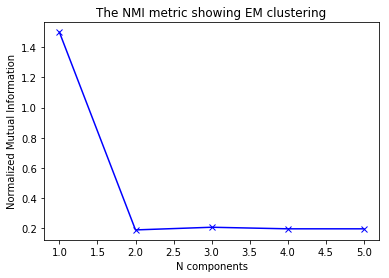

In [9]:
range_n_clusters = list(range(1,6))
nmi = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, random_state=0).fit(X_pca)
    cluster_labels = clusterer.predict(X_pca)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('N components')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing EM clustering')
plt.show()

# Clustering with ICA dimension reduction

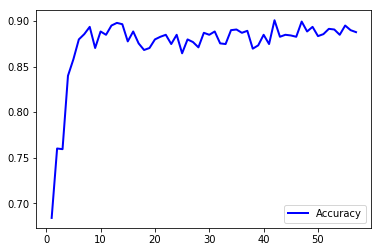

In [10]:
Accuracy = []
for i in range(1,58):
    ica_curr = FastICA(n_components = i)
    X_ica = ica_curr.fit(X).transform(X)
    clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=10)
    FeatTrain4, FeatTest4, LablesTrain4, LablesTest4 = train_test_split(X_ica, Lables, random_state=0, test_size = 0.3)
    clf.fit(FeatTrain4,LablesTrain4)
    test_predict = clf.predict(FeatTest4)
    Accuracy.append(accuracy_score(LablesTest4, test_predict))

temp = list(range(1,58))
plt.plot(temp,Accuracy,color='blue', linewidth=2, markersize=12, label = "Accuracy")
plt.legend(loc="best")

[0.6746376811594202, 0.7579710144927536, 0.7608695652173914, 0.7565217391304347, 0.7579710144927536, 0.7594202898550725, 0.7659420289855072, 0.7702898550724637, 0.7731884057971015, 0.7731884057971015, 0.7557971014492754, 0.7710144927536232, 0.7768115942028986, 0.7811594202898551, 0.7840579710144927, 0.7869565217391304, 0.7746376811594203, 0.7963768115942029, 0.7884057971014493, 0.7833333333333333, 0.7869565217391304, 0.8028985507246377, 0.7913043478260869, 0.7927536231884058, 0.7876811594202898, 0.7884057971014493, 0.7920289855072464, 0.7963768115942029, 0.7992753623188406, 0.808695652173913, 0.7942028985507247, 0.8231884057971014, 0.822463768115942, 0.8304347826086956, 0.8260869565217391, 0.822463768115942, 0.8318840579710145, 0.8289855072463768, 0.8340579710144927, 0.8289855072463768, 0.8297101449275363, 0.8253623188405798, 0.8217391304347826, 0.8326086956521739, 0.8210144927536231, 0.8326086956521739, 0.8289855072463768, 0.8304347826086956, 0.8304347826086956, 0.8347826086956521, 0.

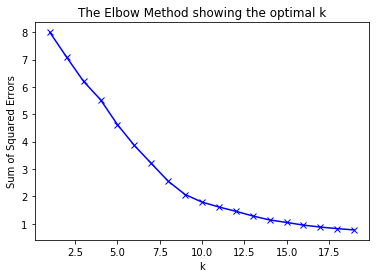

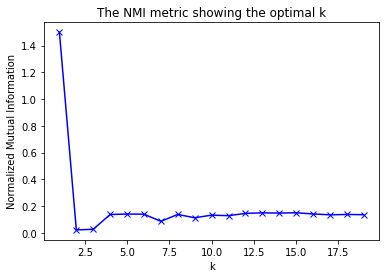

In [46]:
ica = FastICA(n_components=8)
X_ica = ica.fit(X).transform(X)
range_n_clusters = list(range(1,20))
sse = []
nmi = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(X_ica)
    cluster_labels = clusterer.labels_
    sse.append(clusterer.inertia_)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))
    
plt.plot(range_n_clusters, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Errors')
plt.title('The Elbow Method showing the optimal k')
plt.show()

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('k')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing the optimal k')
plt.show()



[ 213.09729885  104.47341869   29.62812067    4.43178244  708.38401489
  720.55067522 2079.41496963   34.33419935]


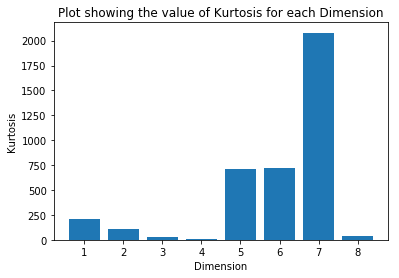

In [43]:
temp1 = list(range(1,9))
p = kurtosis(X_ica)
plt.bar(temp1,p)
plt.xlabel('Dimension')
plt.ylabel('Kurtosis')
plt.title('Plot showing the value of Kurtosis for each Dimension')
print(p)

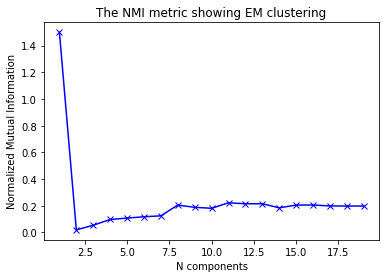

In [12]:
range_n_clusters = list(range(1,20))
nmi = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, random_state=0).fit(X_ica)
    cluster_labels = clusterer.predict(X_ica)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('N components')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing EM clustering')
plt.show()

# Random Projection


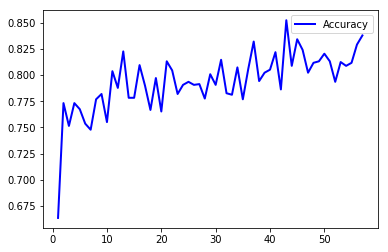

In [50]:
Accuracy = []
for i in range(1,58):
    rp_curr = GaussianRandomProjection(n_components=i)
    X_rp = rp_curr.fit(X).transform(X)
    clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=10)
    FeatTrain4, FeatTest4, LablesTrain4, LablesTest4 = train_test_split(X_rp, Lables, random_state=0, test_size = 0.3)
    clf.fit(FeatTrain4,LablesTrain4)
    test_predict = clf.predict(FeatTest4)
    Accuracy.append(accuracy_score(LablesTest4, test_predict))

temp = list(range(1,58))
plt.plot(temp,Accuracy,color='blue', linewidth=2, markersize=12, label = "Accuracy")
plt.legend(loc="best")

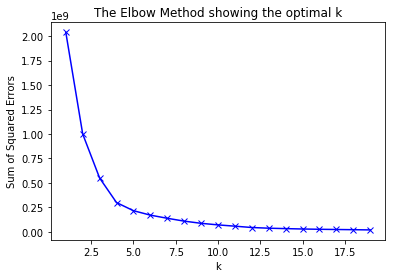

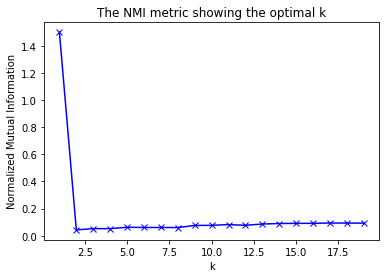

In [70]:
rp = GaussianRandomProjection(n_components=16)
X_rp = rp.fit(X).transform(X)
range_n_clusters = list(range(1,20))
sse = []
nmi = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(X_rp)
    cluster_labels = clusterer.labels_
    sse.append(clusterer.inertia_)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))
    
plt.plot(range_n_clusters, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Errors')
plt.title('The Elbow Method showing the optimal k')
plt.show()

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('k')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing the optimal k')
plt.show()



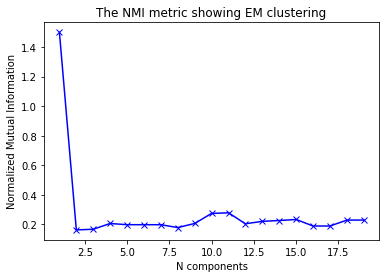

In [15]:
range_n_clusters = list(range(1,20))
nmi = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, random_state=0).fit(X_rp)
    cluster_labels = clusterer.predict(X_rp)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('N components')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing EM clustering')
plt.show()

# Selection Algorithm

In [51]:
kbest_curr = SelectKBest(mutual_info_classif, k='all')
kbest_curr.fit(X,y)
score = kbest_curr.scores_


<BarContainer object of 57 artists>

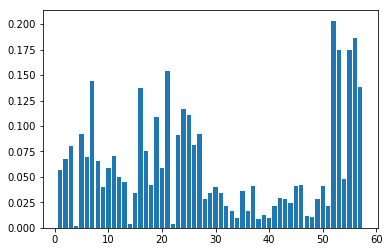

In [52]:
plt.bar(temp,score)

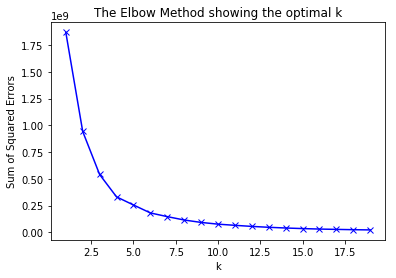

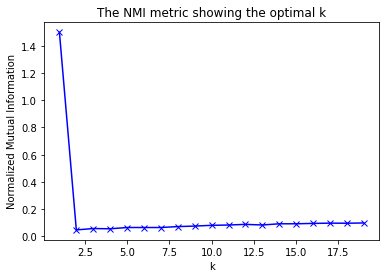

In [53]:
X_s = SelectKBest(mutual_info_classif, k=16).fit_transform(X, y)
sse = []
nmi = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(X_s)
    cluster_labels = clusterer.labels_
    sse.append(clusterer.inertia_)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))
    
plt.plot(range_n_clusters, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Errors')
plt.title('The Elbow Method showing the optimal k')
plt.show()

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('k')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing the optimal k')
plt.show()



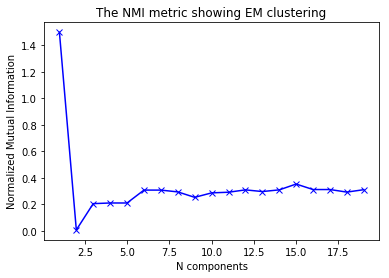

In [17]:
range_n_clusters = list(range(1,20))
nmi = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, random_state=0).fit(X_s)
    cluster_labels = clusterer.predict(X_s)
    nmi.append(normalized_mutual_info_score(y, cluster_labels))

plt.plot(range_n_clusters, nmi, 'bx-')
plt.xlabel('N components')
plt.ylabel('Normalized Mutual Information')
plt.title('The NMI metric showing EM clustering')
plt.show()

# Neural Networks

In [56]:
FeatTrain1, FeatTest1, LablesTrain1, LablesTest1 = train_test_split(X_pca, y, random_state=0, test_size = 0.2)
clf3 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100,100),max_iter=5000, activation = 'relu', solver = 'sgd', learning_rate = 'adaptive')
clf3.fit(FeatTrain1, LablesTrain1)
Testing = clf3.predict(FeatTest1)
TestAccuracy = accuracy_score(LablesTest1, Testing) * 100.
print(TestAccuracy)




87.82608695652175


In [74]:
FeatTrain1, FeatTest1, LablesTrain1, LablesTest1 = train_test_split(X_ica, y, random_state=0, test_size = 0.2)
clf3 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100,100),max_iter=5000, activation = 'relu', solver = 'sgd', learning_rate = 'adaptive')
clf3.fit(FeatTrain1, LablesTrain1)
Testing = clf3.predict(FeatTest1)
TestAccuracy = accuracy_score(LablesTest1, Testing) * 100.
print(TestAccuracy)



58.47826086956521


In [75]:
FeatTrain1, FeatTest1, LablesTrain1, LablesTest1 = train_test_split(X_rp, y, random_state=0, test_size = 0.2)
clf3 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100,100),max_iter=5000, activation = 'relu', solver = 'sgd', learning_rate = 'adaptive')
clf3.fit(FeatTrain1, LablesTrain1)
Testing = clf3.predict(FeatTest1)
TestAccuracy = accuracy_score(LablesTest1, Testing) * 100.
print(TestAccuracy)



90.0


In [59]:
FeatTrain1, FeatTest1, LablesTrain1, LablesTest1 = train_test_split(X_s, y, random_state=0, test_size = 0.2)
clf3 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100,100),max_iter=5000, activation = 'relu', solver = 'sgd', learning_rate = 'adaptive')
clf3.fit(FeatTrain1, LablesTrain1)
Testing = clf3.predict(FeatTest1)
TestAccuracy = accuracy_score(LablesTest1, Testing) * 100.
print(TestAccuracy)



75.43478260869566


In [60]:
clf3 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100,100),max_iter=5000, activation = 'relu', solver = 'sgd', learning_rate = 'adaptive')

clusterer = KMeans(n_clusters=2, random_state=10).fit(X_pca)
y_kmeans = clusterer.labels_
X_df = pd.DataFrame(X_pca)
X_df[17] = y_kmeans
FeatTrain1, FeatTest1, LablesTrain1, LablesTest1 = train_test_split(X_df, y, random_state=0, test_size = 0.2)
clf3.fit(FeatTrain1, LablesTrain1)
Testing = clf3.predict(FeatTest1)
TestAccuracy = accuracy_score(LablesTest1, Testing) * 100.
print(TestAccuracy)

89.67391304347827


In [66]:
clf3 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100,100),max_iter=5000, activation = 'relu', solver = 'sgd', learning_rate = 'adaptive')

clusterer = KMeans(n_clusters=5, random_state=10).fit(X_ica)
y_kmeans = clusterer.labels_
X_df = pd.DataFrame(X_ica)
X_df[9] = y_kmeans
FeatTrain1, FeatTest1, LablesTrain1, LablesTest1 = train_test_split(X_df, y, random_state=0, test_size = 0.2)
clf3.fit(FeatTrain1, LablesTrain1)
Testing = clf3.predict(FeatTest1)
TestAccuracy = accuracy_score(LablesTest1, Testing) * 100.
print(TestAccuracy)

58.47826086956521


In [72]:
clf3 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100,100),max_iter=5000, activation = 'relu', solver = 'sgd', learning_rate = 'adaptive')

clusterer = KMeans(n_clusters=2).fit(X_rp)
y_kmeans = clusterer.labels_
X_df = pd.DataFrame(X_rp)
X_df[17] = y_kmeans
FeatTrain1, FeatTest1, LablesTrain1, LablesTest1 = train_test_split(X_df, y, random_state=0, test_size = 0.2)
clf3.fit(FeatTrain1, LablesTrain1)
Testing = clf3.predict(FeatTest1)
TestAccuracy = accuracy_score(LablesTest1, Testing) * 100.
print(TestAccuracy)

91.08695652173913


In [77]:
clf3 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100,100),max_iter=5000, activation = 'relu', solver = 'sgd', learning_rate = 'adaptive')

clusterer = KMeans(n_clusters=2, random_state=10).fit(X_s)
y_kmeans = clusterer.labels_
X_df = pd.DataFrame(X_s)
X_df[17] = y_kmeans
FeatTrain1, FeatTest1, LablesTrain1, LablesTest1 = train_test_split(X_df, y, random_state=0, test_size = 0.2)
clf3.fit(FeatTrain1, LablesTrain1)
Testing = clf3.predict(FeatTest1)
TestAccuracy = accuracy_score(LablesTest1, Testing) * 100.
print(TestAccuracy)

76.95652173913044


In [81]:
clf3 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100,100),max_iter=5000, activation = 'relu', solver = 'sgd', learning_rate = 'adaptive')

clusterer = GaussianMixture(n_components=2, random_state=10).fit(X_pca)
y_kmeans = clusterer.predict(X_pca)
X_df = pd.DataFrame(X_pca)
X_df[17] = y_kmeans
FeatTrain1, FeatTest1, LablesTrain1, LablesTest1 = train_test_split(X_df, y, random_state=0, test_size = 0.2)
clf3.fit(FeatTrain1, LablesTrain1)
Testing = clf3.predict(FeatTest1)
TestAccuracy = accuracy_score(LablesTest1, Testing) * 100.
print(TestAccuracy)

90.32608695652173


In [84]:
clf3 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100,100),max_iter=5000, activation = 'relu', solver = 'sgd', learning_rate = 'adaptive')

clusterer = GaussianMixture(n_components=5, random_state=10).fit(X_ica)
y_kmeans = clusterer.predict(X_ica)
X_df = pd.DataFrame(X_ica)
X_df[9] = y_kmeans
FeatTrain1, FeatTest1, LablesTrain1, LablesTest1 = train_test_split(X_df, y, random_state=0, test_size = 0.2)
clf3.fit(FeatTrain1, LablesTrain1)
Testing = clf3.predict(FeatTest1)
TestAccuracy = accuracy_score(LablesTest1, Testing) * 100.
print(TestAccuracy)

58.47826086956521


In [95]:
clf3 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100,100),max_iter=5000, activation = 'relu', solver = 'sgd', learning_rate = 'adaptive')

clusterer = GaussianMixture(n_components=2, random_state=10).fit(X_rp)
y_kmeans = clusterer.predict(X_rp)
X_df = pd.DataFrame(X_rp)
X_df[17] = y_kmeans
FeatTrain1, FeatTest1, LablesTrain1, LablesTest1 = train_test_split(X_df, y, random_state=0, test_size = 0.2)
clf3.fit(FeatTrain1, LablesTrain1)
Testing = clf3.predict(FeatTest1)
TestAccuracy = accuracy_score(LablesTest1, Testing) * 100.
print(TestAccuracy)

88.80434782608695


In [93]:
clf3 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100,100),max_iter=5000, activation = 'relu', solver = 'sgd', learning_rate = 'adaptive')

clusterer = GaussianMixture(n_components=2, random_state=10).fit(X_s)
y_kmeans = clusterer.predict(X_s)
X_df = pd.DataFrame(X_s)
X_df[17] = y_kmeans
FeatTrain1, FeatTest1, LablesTrain1, LablesTest1 = train_test_split(X_df, y, random_state=0, test_size = 0.2)
clf3.fit(FeatTrain1, LablesTrain1)
Testing = clf3.predict(FeatTest1)
TestAccuracy = accuracy_score(LablesTest1, Testing) * 100.
print(TestAccuracy)

79.13043478260869
